In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from torch.autograd import Variable
from torch.utils.data import Dataset,DataLoader,TensorDataset
from sklearn.preprocessing import MinMaxScaler
import torch
from torch.autograd import Variable
from torch.utils.data import Dataset,DataLoader,TensorDataset
from sklearn.preprocessing import MinMaxScaler
from torch import nn
import seaborn as sns

In [2]:
dfi = pd.read_csv('./Data/Weather/Weather_NY.csv')
dfi

pickup_datetime  tempm  tempi  dewptm  dewpti   hum  wspdm  wspdi  \
0      2015-12-31 00:15:00    7.8   46.0     6.1    43.0  89.0    7.4    4.6   
1      2015-12-31 00:42:00    7.8   46.0     6.1    43.0  89.0    7.4    4.6   
2      2015-12-31 00:51:00    7.8   46.0     6.1    43.0  89.0    5.6    3.5   
3      2015-12-31 01:51:00    7.2   45.0     5.6    42.1  90.0    7.4    4.6   
4      2015-12-31 02:51:00    7.2   45.0     5.6    42.1  90.0    0.0    0.0   
...                    ...    ...    ...     ...     ...   ...    ...    ...   
10476  2016-12-31 19:51:00    6.1   43.0    -4.4    24.1  47.0    7.4    4.6   
10477  2016-12-31 20:51:00    6.1   43.0    -4.4    24.1  47.0   13.0    8.1   
10478  2016-12-31 21:51:00    6.1   43.0    -5.0    23.0  45.0    9.3    5.8   
10479  2016-12-31 22:51:00    6.7   44.1    -5.0    23.0  43.0   14.8    9.2   
10480  2016-12-31 23:51:00    6.7   44.1    -4.4    24.1  45.0    7.4    4.6   

       wgustm  wgusti  ...  precipm precipi       conds    icon  fog  rain  \
0         NaN     NaN  ...      0.5    0.02  Light Rain    rain    0     1   
1         NaN     NaN  ...      0.8    0.03    Overcast  cloudy    0     0   
2         NaN     NaN  ...      0.8    0.03    Overcast  cloudy    0     0   
3         NaN     NaN  ...      0.3    0.01    Overcast  cloudy    0     0   
4         NaN     NaN  ...      NaN     NaN    Overcast  cloudy    0     0   
...       ...     ...  ...      ...     ...         ...     ...  ...   ...   
10476     NaN     NaN  ...      NaN     NaN    Overcast  cloudy    0     0   
10477    38.9    24.2  ...      NaN     NaN    Overcast  cloudy    0     0   
10478    29.6    18.4  ...      NaN     NaN    Overcast  cloudy    0     0   
10479     NaN     NaN  ...      NaN     NaN    Overcast  cloudy    0     0   
10480    25.9    16.1  ...      NaN     NaN    Overcast  cloudy    0     0   

       snow  hail  thunder  tornado  
0         0     0        0        0  
1         0     0        0        0  
2         0     0        0        0  
3         0     0        0        0  
4         0     0        0        0  
...     ...   ...      ...      ...  
10476     0     0        0        0  
10477     0     0        0        0  
10478     0     0        0        0  
10479     0     0        0        0  
10480     0     0        0        0  

[10481 rows x 30 columns]

In [3]:
df = dfi.loc[dfi['pickup_datetime'] > '2016-08-01']
df

pickup_datetime  tempm  tempi  dewptm  dewpti   hum  wspdm  wspdi  \
6122   2016-08-01 00:51:00    3.0   37.4    -6.0    21.2  52.0    NaN    NaN   
6123   2016-08-01 01:51:00    3.0   37.4    -6.0    21.2  52.0    NaN    NaN   
6124   2016-08-01 02:51:00    3.0   37.4    -6.0    21.2  52.0    NaN    NaN   
6125   2016-08-01 03:51:00    2.0   35.6    -7.0    19.4  52.0    NaN    NaN   
6126   2016-08-01 04:51:00    2.0   35.6    -8.0    17.6  48.0    NaN    NaN   
...                    ...    ...    ...     ...     ...   ...    ...    ...   
10476  2016-12-31 19:51:00    6.1   43.0    -4.4    24.1  47.0    7.4    4.6   
10477  2016-12-31 20:51:00    6.1   43.0    -4.4    24.1  47.0   13.0    8.1   
10478  2016-12-31 21:51:00    6.1   43.0    -5.0    23.0  45.0    9.3    5.8   
10479  2016-12-31 22:51:00    6.7   44.1    -5.0    23.0  43.0   14.8    9.2   
10480  2016-12-31 23:51:00    6.7   44.1    -4.4    24.1  45.0    7.4    4.6   

       wgustm  wgusti  ...  precipm precipi     conds     icon  fog  rain  \
6122      NaN     NaN  ...      NaN     NaN   Unknown  unknown    0     0   
6123      NaN     NaN  ...      NaN     NaN   Unknown  unknown    0     0   
6124      NaN     NaN  ...      NaN     NaN   Unknown  unknown    0     0   
6125      NaN     NaN  ...      NaN     NaN   Unknown  unknown    0     0   
6126      NaN     NaN  ...      NaN     NaN   Unknown  unknown    0     0   
...       ...     ...  ...      ...     ...       ...      ...  ...   ...   
10476     NaN     NaN  ...      NaN     NaN  Overcast   cloudy    0     0   
10477    38.9    24.2  ...      NaN     NaN  Overcast   cloudy    0     0   
10478    29.6    18.4  ...      NaN     NaN  Overcast   cloudy    0     0   
10479     NaN     NaN  ...      NaN     NaN  Overcast   cloudy    0     0   
10480    25.9    16.1  ...      NaN     NaN  Overcast   cloudy    0     0   

       snow  hail  thunder  tornado  
6122      0     0        0        0  
6123      0     0        0        0  
6124      0     0        0        0  
6125      0     0        0        0  
6126      0     0        0        0  
...     ...   ...      ...      ...  
10476     0     0        0        0  
10477     0     0        0        0  
10478     0     0        0        0  
10479     0     0        0        0  
10480     0     0        0        0  

[4359 rows x 30 columns]

In [4]:
df = df[['pickup_datetime','pressurem','tempm','hum','dewptm']]
df = df.set_index('pickup_datetime')
df = df.dropna()
#df = df.reset_index(drop=True)
df

pressurem  tempm   hum  dewptm
pickup_datetime                                    
2016-08-01 14:28:00     1022.2    6.1  62.0    -0.6
2016-08-01 14:51:00     1021.6    6.1  62.0    -0.6
2016-08-01 15:51:00     1021.7    6.1  68.0     0.6
2016-08-01 16:51:00     1021.5    6.7  65.0     0.6
2016-08-01 17:28:00     1022.6    6.7  65.0     0.6
...                        ...    ...   ...     ...
2016-12-31 19:51:00     1013.8    6.1  47.0    -4.4
2016-12-31 20:51:00     1012.9    6.1  47.0    -4.4
2016-12-31 21:51:00     1012.5    6.1  45.0    -5.0
2016-12-31 22:51:00     1012.4    6.7  43.0    -5.0
2016-12-31 23:51:00     1012.0    6.7  45.0    -4.4

[4245 rows x 4 columns]

# **STATISTICAL TESTS**

<Axes: xlabel='pickup_datetime'>

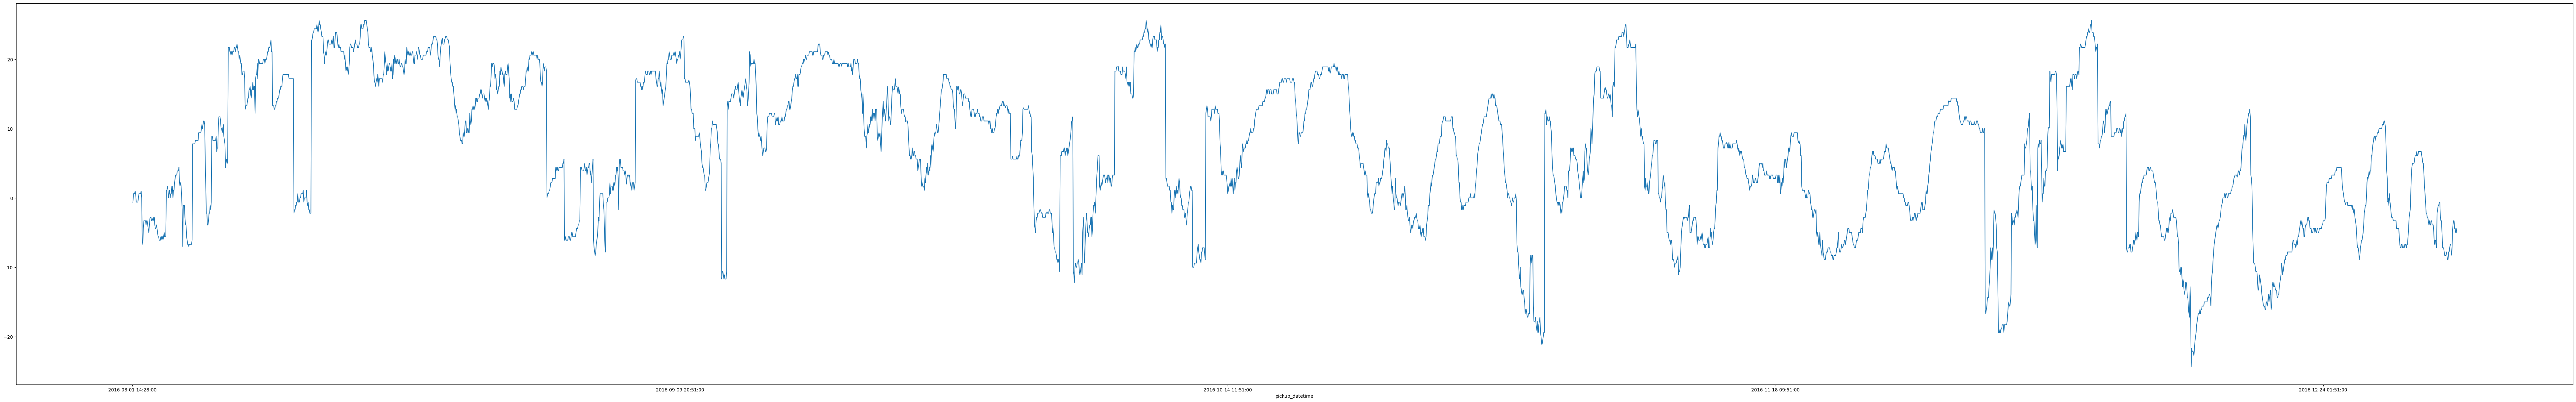

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 100, 15
df['dewptm'].plot()

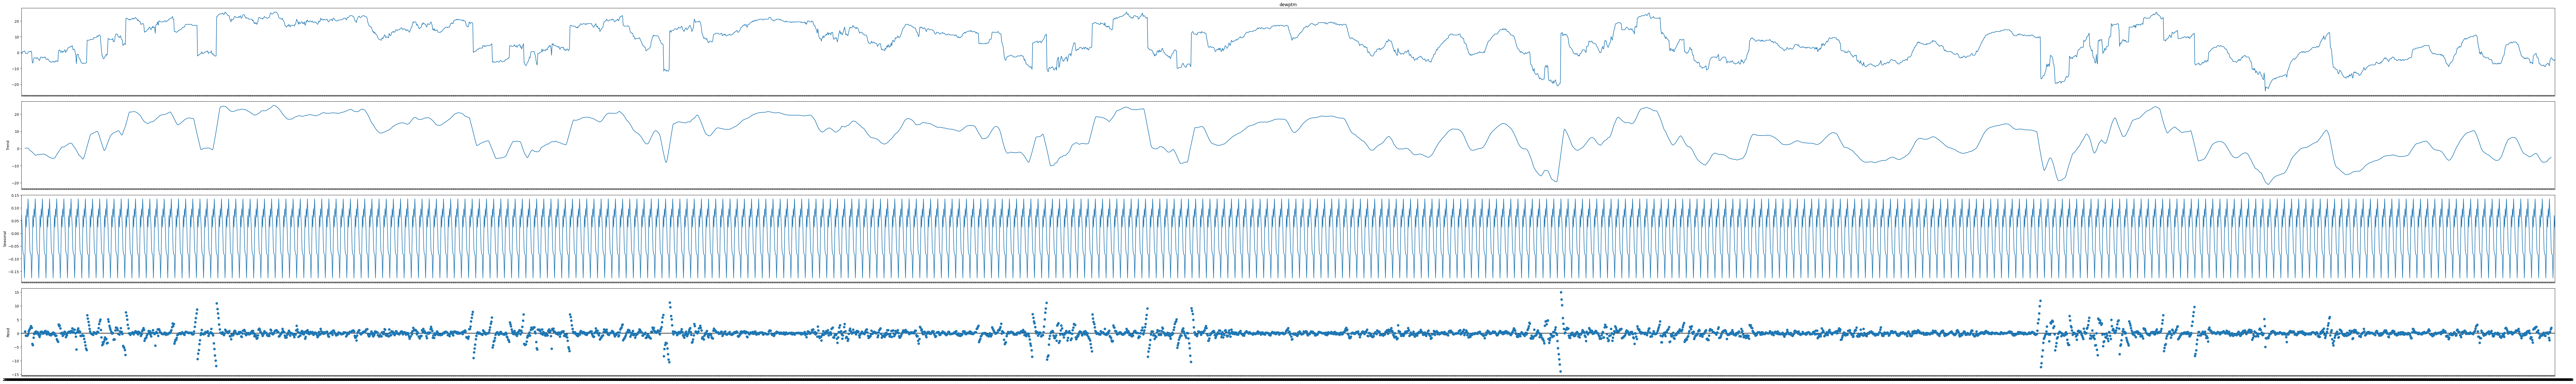

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['dewptm'], model='additive', period=12) 
result.plot()
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

def adf_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [8]:
adf_test(df['dewptm'])

ADF Test Statistic : -5.984012224067466
p-value : 1.8101872502799393e-07
#Lags Used : 4
Number of Observations : 4240
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


<Figure size 1200x600 with 0 Axes>

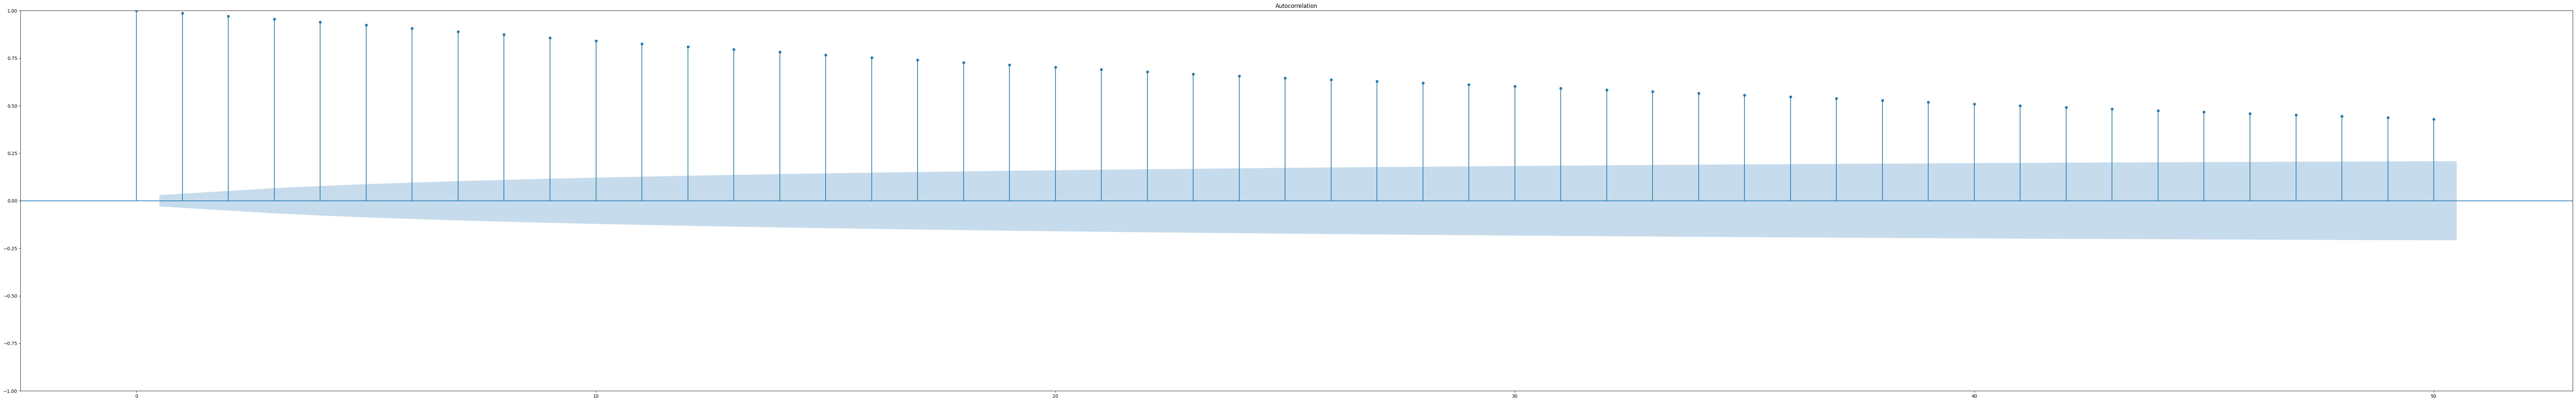

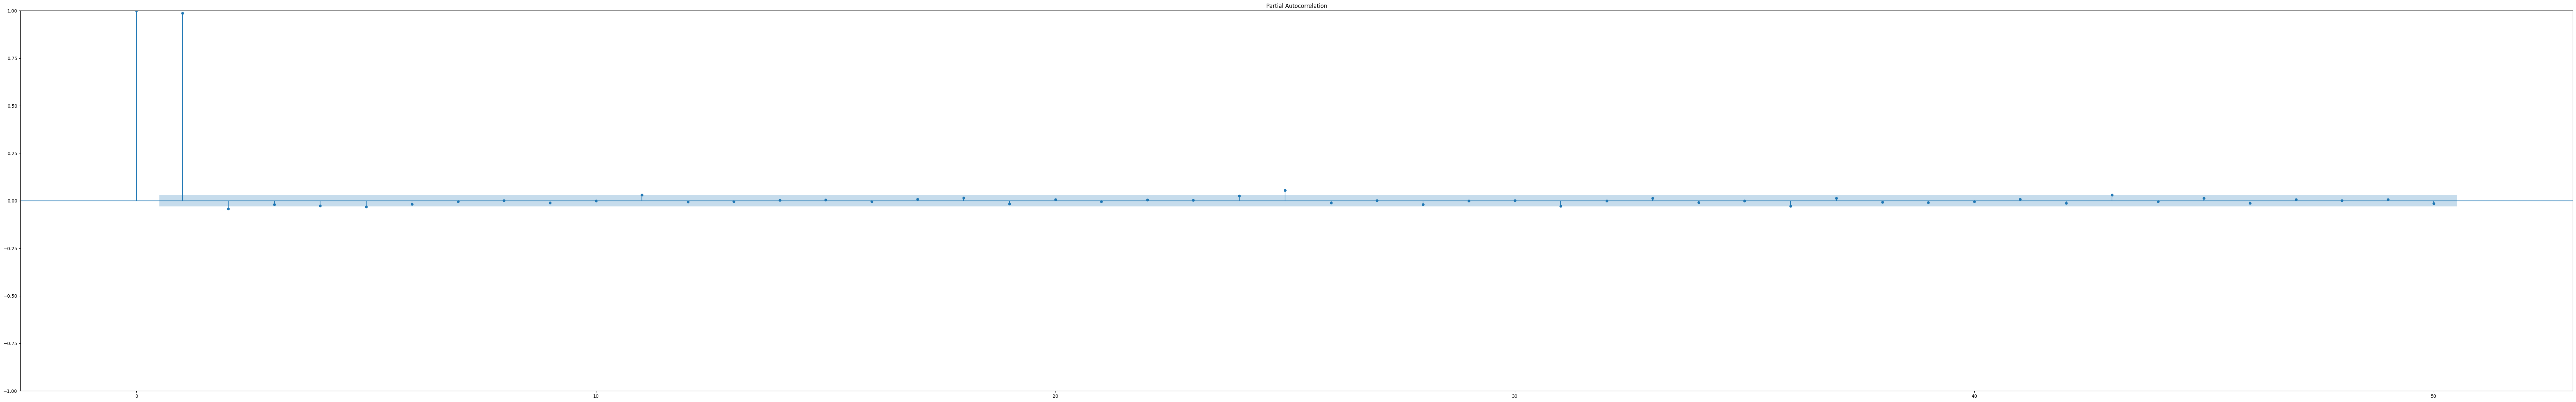

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df['dewptm'], lags=50) # p = 
plot_pacf(df['dewptm'], lags=50) # q = 
plt.show()

# **ARIMA MODEL**

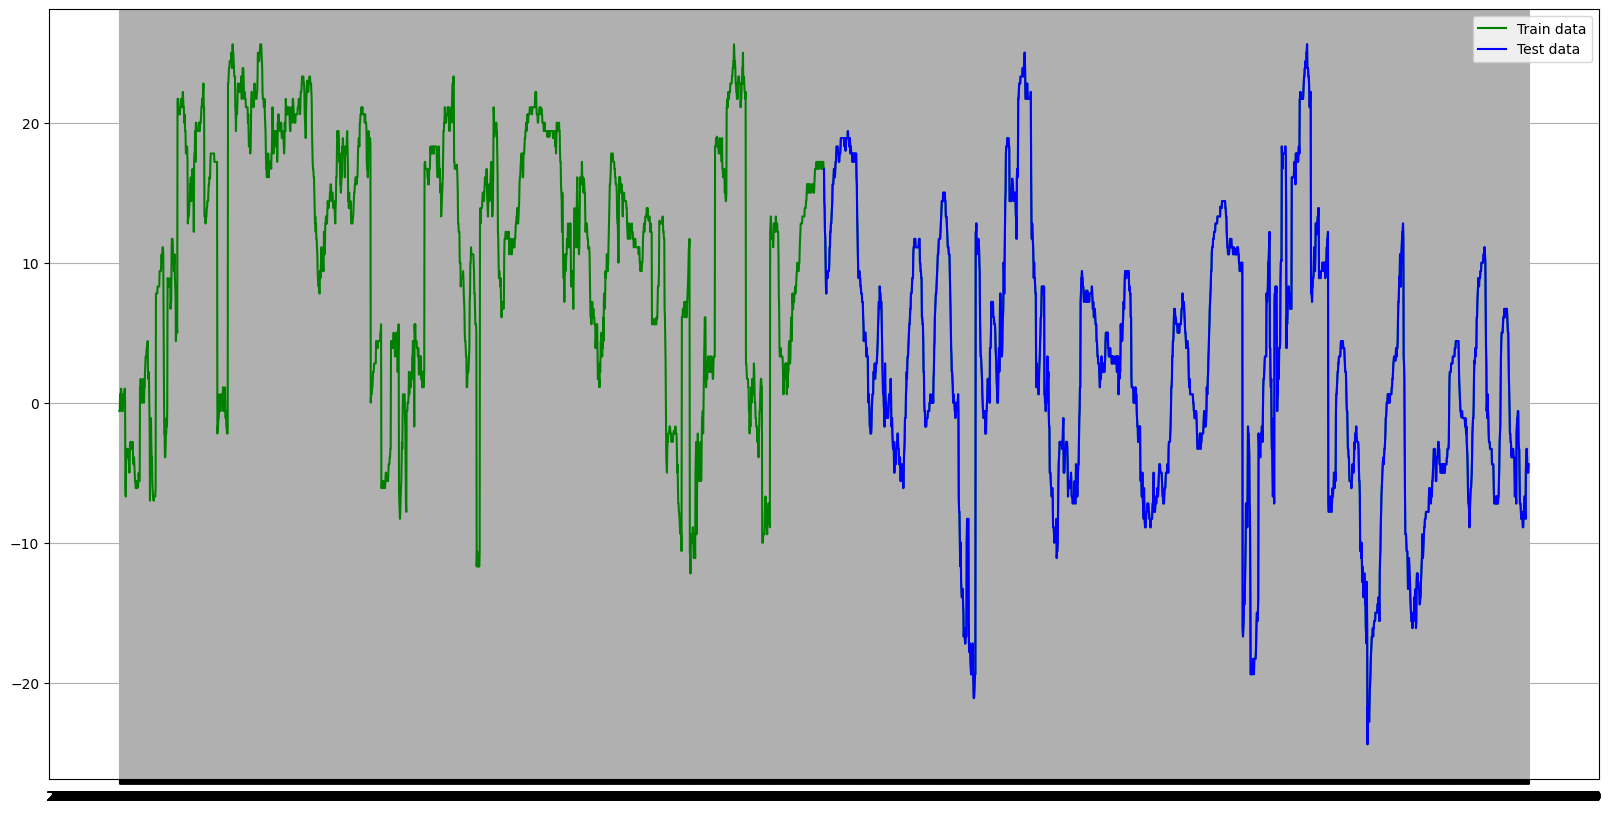

In [10]:
train_data, test_data = df[:int(len(df)*0.5)], df[int(len(df)*0.5):]
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(df['dewptm'], 'green', label='Train data')
plt.plot(test_data['dewptm'], 'blue', label='Test data')
plt.legend()

In [11]:
"""import itertools
import warnings
warnings.filterwarnings("ignore")
q_arima = range(0, 12)
d_arima = range(0,3)
p_arima = range(0, 12)
AIC_arima = []
ARIMAX_model = []
pdqs = [(x[0], x[1], x[2]) for x in list(itertools.product(p_arima, d_arima, q_arima))]

for pdq in pdqs:
    try:
        mod = ARIMA(train_data['dewptm'],order=pdq)

        results = mod.fit()
        print('ARIMAX{} - AIC:{}'.format(pdq, results.aic), end='\r')
        AIC_arima.append(results.aic)
        ARIMAX_model.append([(1,1,0), pdq])
    except:
            continue
    
print('The smallest AIC is {} for model ARIMAX{}'.format(min(AIC_arima),ARIMAX_model[AIC_arima.index(min(AIC_arima))][1]))
order_a = ARIMAX_model[AIC_arima.index(min(AIC_arima))][1]"""

'import itertools\nimport warnings\nwarnings.filterwarnings("ignore")\nq_arima = range(0, 12)\nd_arima = range(0,3)\np_arima = range(0, 12)\nAIC_arima = []\nARIMAX_model = []\npdqs = [(x[0], x[1], x[2]) for x in list(itertools.product(p_arima, d_arima, q_arima))]\n\nfor pdq in pdqs:\n    try:\n        mod = ARIMA(train_data[\'dewptm\'],order=pdq)\n\n        results = mod.fit()\n        print(\'ARIMAX{} - AIC:{}\'.format(pdq, results.aic), end=\'\r\')\n        AIC_arima.append(results.aic)\n        ARIMAX_model.append([(1,1,0), pdq])\n    except:\n            continue\n    \nprint(\'The smallest AIC is {} for model ARIMAX{}\'.format(min(AIC_arima),ARIMAX_model[AIC_arima.index(min(AIC_arima))][1]))\norder_a = ARIMAX_model[AIC_arima.index(min(AIC_arima))][1]'

In [12]:
#The smallest AIC is 19135.186339359283 for model ARIMAX(1, 0, 0)
order_a = (1,0,0)

In [13]:
train, test = train_data['dewptm'], test_data['dewptm']

model = ARIMA(train, order=order_a)
result = model.fit()

forecast_a = result.get_forecast(steps=len(test))
predicted_mean = forecast_a.predicted_mean

mse = mean_squared_error(test, predicted_mean)
rmse = math.sqrt(mse)
print(f'Mean Squared Error: {mse}')

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Squared Error: 169.52755791976904


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [14]:
print(mse)
print(rmse)

169.52755791976904
13.020274878809934


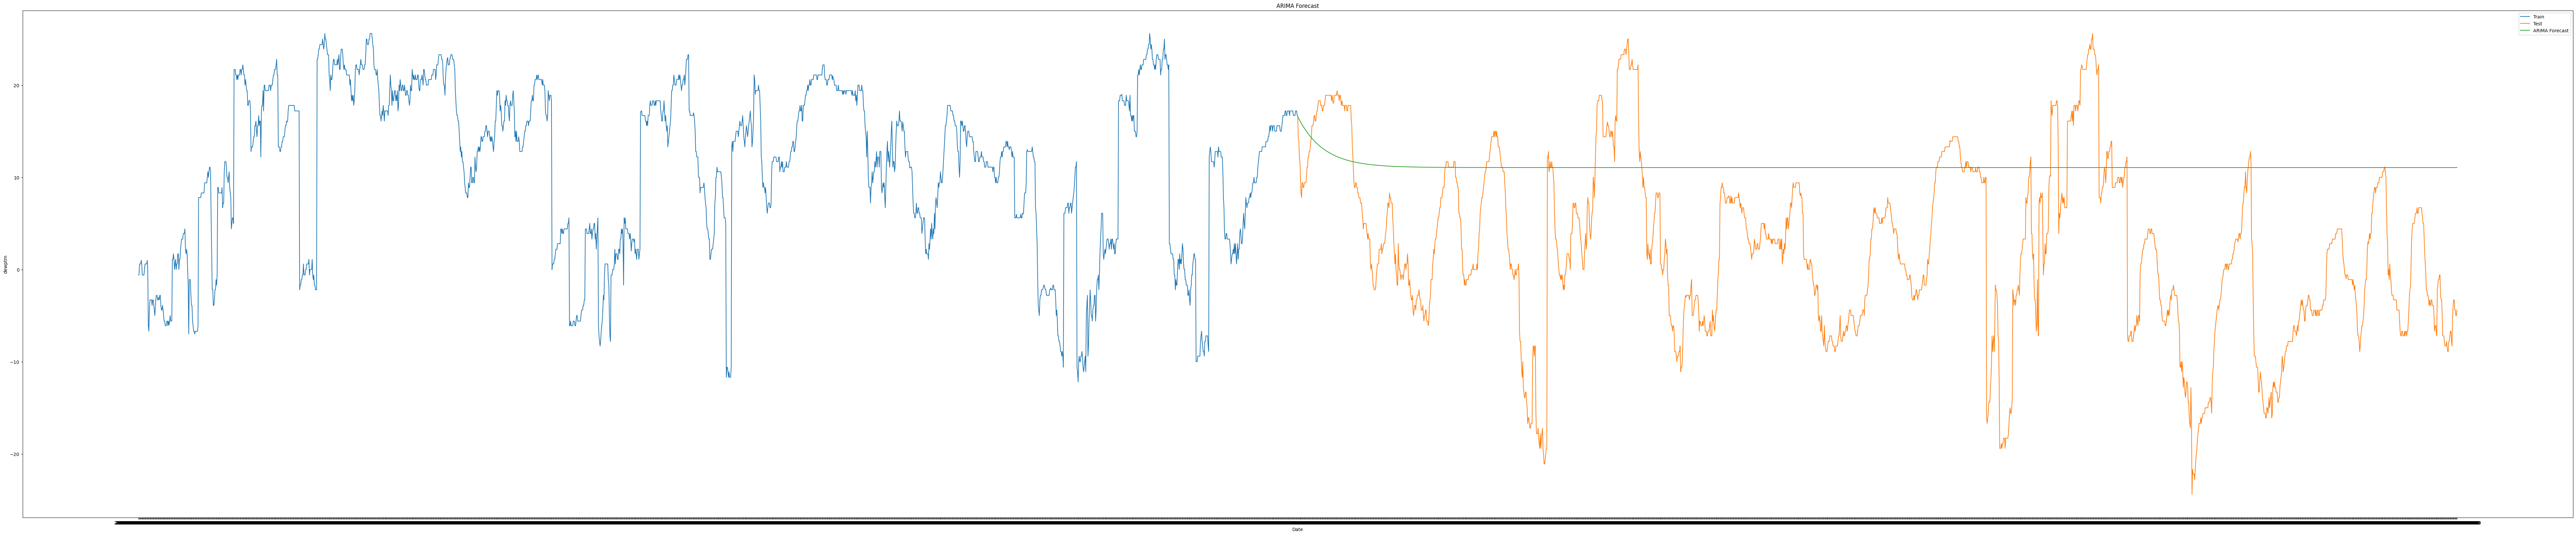

In [15]:
plt.figure(figsize=(100, 20))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_mean, label='ARIMA Forecast')
# plt.fill_between(forecast.conf_int().index,
#                  forecast.conf_int().iloc[:, 0],
#                  forecast.conf_int().iloc[:, 1], color='k', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('dewptm')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

# **QLSTM MODEL**

In [16]:
ARIMA_Result =  pd.DataFrame(columns=['raw', 'predicted','residuals'])
ARIMA_Result['raw'] = test_data['dewptm'].copy()
ARIMA_Result['predicted'] = predicted_mean.to_numpy()
ARIMA_Result['residuals'] = ARIMA_Result['raw'] - ARIMA_Result['predicted']
std_residuals = ARIMA_Result['residuals'].std()
ARIMA_Result['std_residuals'] = ARIMA_Result['residuals'] / std_residuals
ARIMA_Result['nxt_target'] = ARIMA_Result['residuals'].shift(-1)
ARIMA_Result['nxt_target'][len(ARIMA_Result)-1] = ARIMA_Result['nxt_target'][len(ARIMA_Result)-2]
ARIMA_Result

/tmp/ipykernel_21050/2090674876.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ARIMA_Result['nxt_target'][len(ARIMA_Result)-1] = ARIMA_Result['nxt_target'][len(ARIMA_Result)-2]
/tmp/ipykernel_21050/2090674876.py:8: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ARIMA_Result['nxt_target'][len(ARIMA_Result)-1] = ARIMA_Result['nxt_target'][len(ARIMA_Result)-2]


raw  predicted  residuals  std_residuals  nxt_target
pickup_datetime                                                           
2016-10-19 13:51:00  16.7  16.580886   0.119114       0.012599   -2.064285
2016-10-19 14:51:00  14.4  16.464285  -2.064285      -0.218350   -2.450146
2016-10-19 15:51:00  13.9  16.350146  -2.450146      -0.259164   -4.038416
2016-10-19 16:51:00  12.2  16.238416  -4.038416      -0.427164   -4.429045
2016-10-19 17:51:00  11.7  16.129045  -4.429045      -0.468482   -6.021982
...                   ...        ...        ...            ...         ...
2016-12-31 19:51:00  -4.4  11.056827 -15.456827      -1.634947  -15.456827
2016-12-31 20:51:00  -4.4  11.056827 -15.456827      -1.634947  -16.056827
2016-12-31 21:51:00  -5.0  11.056827 -16.056827      -1.698412  -16.056827
2016-12-31 22:51:00  -5.0  11.056827 -16.056827      -1.698412  -15.456827
2016-12-31 23:51:00  -4.4  11.056827 -15.456827      -1.634947  -15.456827

[2123 rows x 5 columns]

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch import Tensor
from torch.nn import Parameter
import torch.utils.data as Data
from torch.utils.data import RandomSampler
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.metrics import mean_squared_error
import pennylane as qml
import pytorch_lightning as pl
import math
import time

In [18]:
def data_process(data, window_size, predict_size):
    scaler1 = StandardScaler()
    scaler2 = StandardScaler()
    d_y = scaler1.fit_transform(data.iloc[:,-1:]) 
    data = scaler2.fit_transform(data.iloc[:,:1])

    data_in = []
    data_out = []
    # range(window_size,len(data)-predict_size+1) range(data.shape[0] - window_size - predict_size + 1)
    for i in range(window_size,len(data)-predict_size+1):
        data_in.append(data[i-window_size:i,0:data.shape[0]])
        data_out.append(d_y[i + predict_size - 1:i + predict_size,0])

    data_in = np.array(data_in)
    data_out = np.array(data_out)

    data_process = {'datain': data_in, 'dataout': data_out}

    return data_process, scaler1 , scaler2

In [19]:
from numpy.random import default_rng
from qiskit_algorithms.utils import algorithm_globals
qubits = 2
seed = 42
np.random.seed(seed)
torch.manual_seed(42)
rng = default_rng(seed)
algorithm_globals.random_seed = seed
features_size = 1
#window_size = features_size * 3
window_size = 10
predict_size = 1

In [20]:
size = int(len(ARIMA_Result) * 0.5)

train = ARIMA_Result[['residuals','nxt_target']][:size].copy()
test = ARIMA_Result[['residuals','nxt_target']][size:].copy()

In [21]:
train_processed, train_target_scalar, train_scaler = data_process(train, window_size, predict_size)
X_train, y_train = train_processed['datain'], train_processed['dataout']

test_processed, test_target_scalar, test_scaler = data_process(test, window_size, predict_size)
X_test, y_test = test_processed['datain'], test_processed['dataout']

In [22]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [23]:
class QLSTM(nn.Module):
    def __init__(self,
                input_size,
                hidden_size,
                n_qubits=4,
                n_qlayers=1,
                batch_first=True,
                return_sequences=False,
                return_state=False,
                backend="default.qubit"):
        super(QLSTM, self).__init__()
        self.n_inputs = input_size
        self.hidden_size = hidden_size
        self.concat_size = self.n_inputs + self.hidden_size
        self.n_qubits = n_qubits
        self.n_qlayers = n_qlayers
        self.backend = backend  # "default.qubit", "qiskit.basicaer", "qiskit.ibm"

        self.batch_first = batch_first
        self.return_sequences = return_sequences
        self.return_state = return_state

        #self.dev = qml.device("default.qubit", wires=self.n_qubits)
        #self.dev = qml.device('qiskit.basicaer', wires=self.n_qubits)
        #self.dev = qml.device('qiskit.ibm', wires=self.n_qubits)
        # use 'qiskit.ibmq' instead to run on hardware

        self.wires_forget = [f"wire_forget_{i}" for i in range(self.n_qubits)]
        self.wires_input = [f"wire_input_{i}" for i in range(self.n_qubits)]
        self.wires_update = [f"wire_update_{i}" for i in range(self.n_qubits)]
        self.wires_output = [f"wire_output_{i}" for i in range(self.n_qubits)]

        self.dev_forget = qml.device(self.backend, wires=self.wires_forget)
        self.dev_input = qml.device(self.backend, wires=self.wires_input)
        self.dev_update = qml.device(self.backend, wires=self.wires_update)
        self.dev_output = qml.device(self.backend, wires=self.wires_output)

        def _circuit_forget(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_forget)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_forget)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_forget]
        self.qlayer_forget = qml.QNode(_circuit_forget, self.dev_forget, interface="torch")

        def _circuit_input(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_input)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_input)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_input]
        self.qlayer_input = qml.QNode(_circuit_input, self.dev_input, interface="torch")

        def _circuit_update(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_update)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_update)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_update]
        self.qlayer_update = qml.QNode(_circuit_update, self.dev_update, interface="torch")

        def _circuit_output(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_output)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_output)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_output]
        self.qlayer_output = qml.QNode(_circuit_output, self.dev_output, interface="torch")

        weight_shapes = {"weights": (n_qlayers, n_qubits)}
        print(f"weight_shapes = (n_qlayers, n_qubits) = ({n_qlayers}, {n_qubits})")

        self.clayer_in = torch.nn.Linear(self.concat_size, n_qubits)
        self.VQC = {
            'forget': qml.qnn.TorchLayer(self.qlayer_forget, weight_shapes),
            'input': qml.qnn.TorchLayer(self.qlayer_input, weight_shapes),
            'update': qml.qnn.TorchLayer(self.qlayer_update, weight_shapes),
            'output': qml.qnn.TorchLayer(self.qlayer_output, weight_shapes)
        }
        self.clayer_out = torch.nn.Linear(self.n_qubits, self.hidden_size)
        #self.clayer_out = [torch.nn.Linear(n_qubits, self.hidden_size) for _ in range(4)]

    def forward(self, x, init_states=None):
        '''
        x.shape is (batch_size, seq_length, feature_size)
        recurrent_activation -> sigmoid
        activation -> tanh
        '''
        if self.batch_first is True:
            batch_size, seq_length, features_size = x.size()
        else:
            seq_length, batch_size, features_size = x.size()

        hidden_seq = []
        if init_states is None:
            h_t = torch.zeros(batch_size, self.hidden_size)  # hidden state (output)
            c_t = torch.zeros(batch_size, self.hidden_size)  # cell state
        else:
            # for now we ignore the fact that in PyTorch you can stack multiple RNNs
            # so we take only the first elements of the init_states tuple init_states[0][0], init_states[1][0]
            h_t, c_t = init_states
            h_t = h_t[0]
            c_t = c_t[0]

        for t in range(seq_length):
            # get features from the t-th element in seq, for all entries in the batch
            x_t = x[:, t, :]

            # Concatenate input and hidden state
            v_t = torch.cat((h_t, x_t), dim=1)

            # match qubit dimension
            y_t = self.clayer_in(v_t)

            f_t = torch.sigmoid(self.clayer_out(self.VQC['forget'](y_t)))  # forget block
            i_t = torch.sigmoid(self.clayer_out(self.VQC['input'](y_t)))  # input block
            g_t = torch.tanh(self.clayer_out(self.VQC['update'](y_t)))  # update block
            o_t = torch.sigmoid(self.clayer_out(self.VQC['output'](y_t))) # output block

            c_t = (f_t * c_t) + (i_t * g_t)
            h_t = o_t * torch.tanh(c_t)

            hidden_seq.append(h_t.unsqueeze(0))
        hidden_seq = torch.cat(hidden_seq, dim=0)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()
        return hidden_seq, (h_t, c_t)

class QRegressionLSTM(nn.Module):
    def __init__(self, num_sensors, hidden_units, n_qubits=0, n_qlayers=1):
        super().__init__()
        self.num_sensors = num_sensors  # this is the number of features
        self.hidden_units = hidden_units
        self.num_layers = 1

        self.lstm = QLSTM(
            input_size=num_sensors,
            hidden_size=hidden_units,
            batch_first=True,
            n_qubits = n_qubits,
            n_qlayers= n_qlayers
        )

        self.linear = nn.Linear(in_features=self.hidden_units, out_features=1)

    def forward(self, x):
        batch_size = x.shape[0]
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()

        _, (hn, _) = self.lstm(x, (h0, c0))
        out = self.linear(hn).flatten()  # First dim of Hn is num_layers, which is set to 1 above.

        return out

In [24]:
batch_size = 4
learning_rate = 0.004
num_epochs = 5
trainDataloader = DataLoader(TensorDataset(X_train, y_train), batch_size = batch_size, shuffle = False)
testDataloader = DataLoader(TensorDataset(X_test,y_test), batch_size = batch_size, shuffle = False)
device = "cpu"
modelQ = QRegressionLSTM(num_sensors=1, hidden_units= 6, n_qubits=1)
criterion = nn.MSELoss()
optimizerQ = torch.optim.Adam(modelQ.parameters(), lr = learning_rate, betas = (0.0, 0.9))

weight_shapes = (n_qlayers, n_qubits) = (1, 1)


In [25]:
histQ = np.zeros(num_epochs)
histQacc = np.zeros(num_epochs)

count = 0
for epoch in range(num_epochs):
    loss_Q = []
    rmse_q = []
    correct = 0
    batches = 0
    for (x, y) in trainDataloader:
        modelQ.zero_grad()
        x = x.to(device)
        y = y.to(device)
        output = modelQ(x)

        label = y.squeeze(1)
        #print(output)
        #print(label)
        lossQ = criterion(output, label)
        lossQ.backward()
        optimizerQ.step()
        
        #correct += (output == label).float().sum()
        #batches +=1
        
        loss_Q.append(lossQ.item())
    histQ[epoch] = np.sum(loss_Q)
    
    #print(correct)
    #histQacc[epoch] = correct/batches
    print(f'[{epoch+1}/{num_epochs}]  LossQ:{np.sum(loss_Q)}')

[1/5]  LossQ:215.85941013523552
[2/5]  LossQ:84.21588031886495
[3/5]  LossQ:30.915506283170544
[4/5]  LossQ:22.307733730704058
[5/5]  LossQ:19.72129476506234


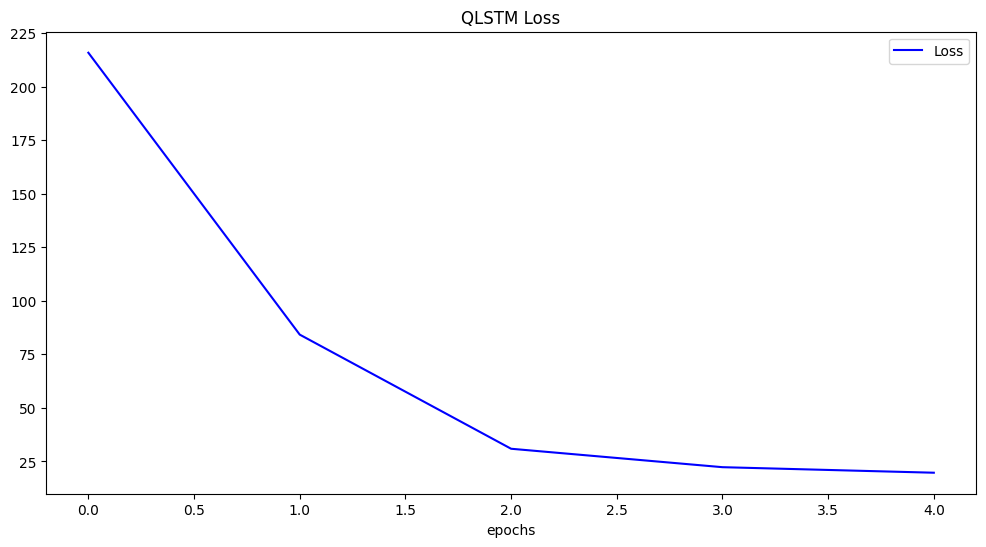

In [26]:
np.savetxt('./SavedModels/Weather/NY/loss/arima_qlstm.txt',histQ)
plt.figure(figsize = (12, 6))
plt.plot(histQ, color = 'blue', label = 'Loss')
plt.title('QLSTM Loss')
plt.xlabel('epochs')
plt.legend(loc = 'upper right')

In [27]:
histQ1 = histQ 

In [28]:
def predict(data_loader, model):
    """Just like `test_loop` function but keep track of the outputs instead of the loss
    function.
    """
    output = torch.tensor([])
    model.eval()
    with torch.no_grad():
        for X, _ in data_loader:
            y_star = model(X)
            output = torch.cat((output, y_star), 0)


    return output

In [29]:
pred_y_train = modelQ(X_train)
pred_y_test = modelQ(X_test)

print(pred_y_train)

tensor([0.1559, 0.1341, 0.1254,  ..., 0.3572, 0.3090, 0.2955],
       grad_fn=<ViewBackward0>)


In [30]:
pred_y_train = pred_y_train.reshape(-1, 1)
pred_y_test = pred_y_test.reshape(-1, 1)
pred_y_train

tensor([[0.1559],
        [0.1341],
        [0.1254],
        ...,
        [0.3572],
        [0.3090],
        [0.2955]], grad_fn=<ViewBackward0>)

In [31]:
y_train_true = train_target_scalar.inverse_transform(y_train)
y_train_pred = train_target_scalar.inverse_transform(pred_y_train.cpu().detach().numpy())
y_test_true = test_target_scalar.inverse_transform(y_test)
y_test_pred = test_target_scalar.inverse_transform(pred_y_test.cpu().detach().numpy())

In [32]:
np.savetxt('./SavedModels/Weather/NY/train/arima_qlstm.txt',y_train_pred)
np.savetxt('./SavedModels/Weather/NY/test/arima_qlstm.txt',y_test_pred)

Training dataset MSE: 7.48052155170761 RMSE:2.735054213668828


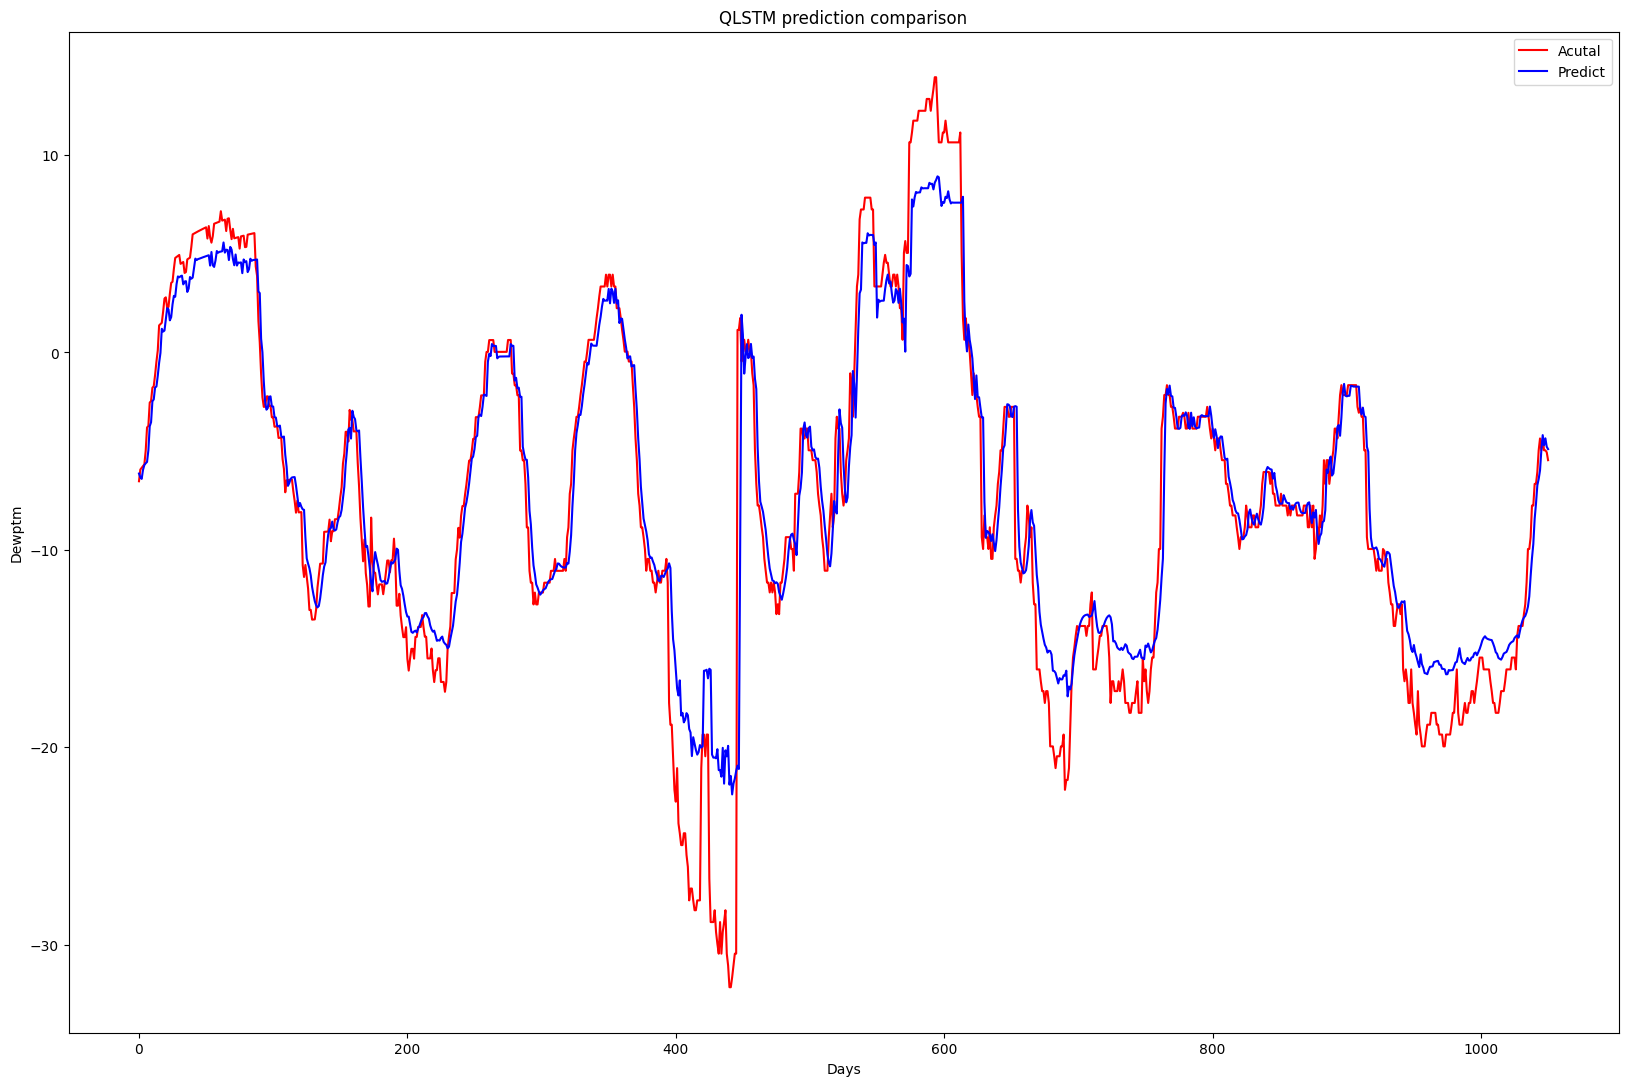

In [33]:
plt.figure(figsize=(20, 13))
plt.plot(y_train_true, color = 'red', label = 'Acutal')
plt.plot(y_train_pred, color = 'blue', label = 'Predict')
plt.title('QLSTM prediction comparison')
plt.ylabel('Dewptm')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_train_true, y_train_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset MSE: {MSE} RMSE:{RMSE}')

Training dataset MSE:10.736410817756898 RMSE:3.2766462759591395


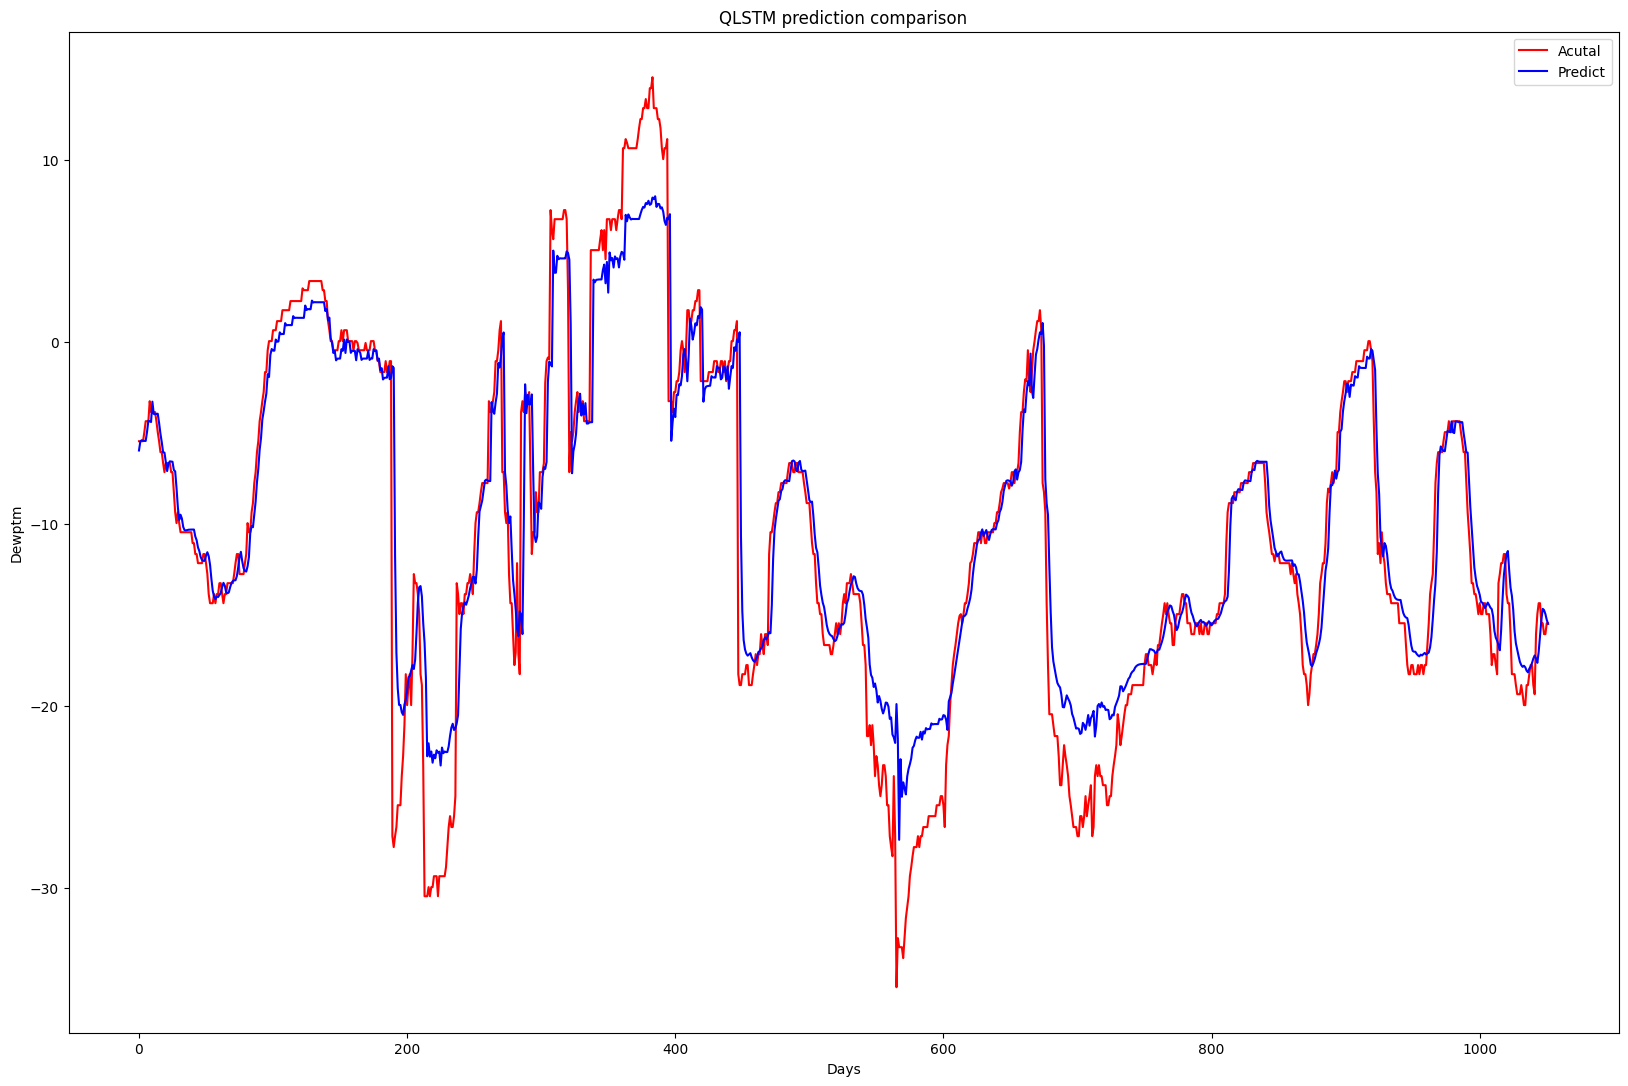

In [34]:
plt.figure(figsize=(20, 13))
plt.plot(y_test_true, color = 'red', label = 'Acutal')
plt.plot(y_test_pred, color = 'blue', label = 'Predict')
plt.title('QLSTM prediction comparison')
plt.ylabel('Dewptm')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_test_true, y_test_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset MSE:{MSE} RMSE:{RMSE}')

In [35]:
final_result_qlstm = ARIMA_Result['predicted'][size+window_size:].values + y_test_pred.squeeze(1)

In [36]:
frq = ARIMA_Result[['predicted','raw']][size+window_size:].copy()
frq['final'] = final_result_qlstm
frq

predicted  raw     final
pickup_datetime                              
2016-11-25 09:51:00  11.056827  5.6  5.090661
2016-11-25 10:51:00  11.056827  5.6  5.582518
2016-11-25 11:51:00  11.056827  5.6  5.654314
2016-11-25 12:51:00  11.056827  5.6  5.626491
2016-11-25 13:51:00  11.056827  5.6  5.616651
...                        ...  ...       ...
2016-12-31 19:51:00  11.056827 -4.4 -3.608384
2016-12-31 20:51:00  11.056827 -4.4 -3.679947
2016-12-31 21:51:00  11.056827 -5.0 -3.892464
2016-12-31 22:51:00  11.056827 -5.0 -4.210750
2016-12-31 23:51:00  11.056827 -4.4 -4.438216

[1052 rows x 3 columns]

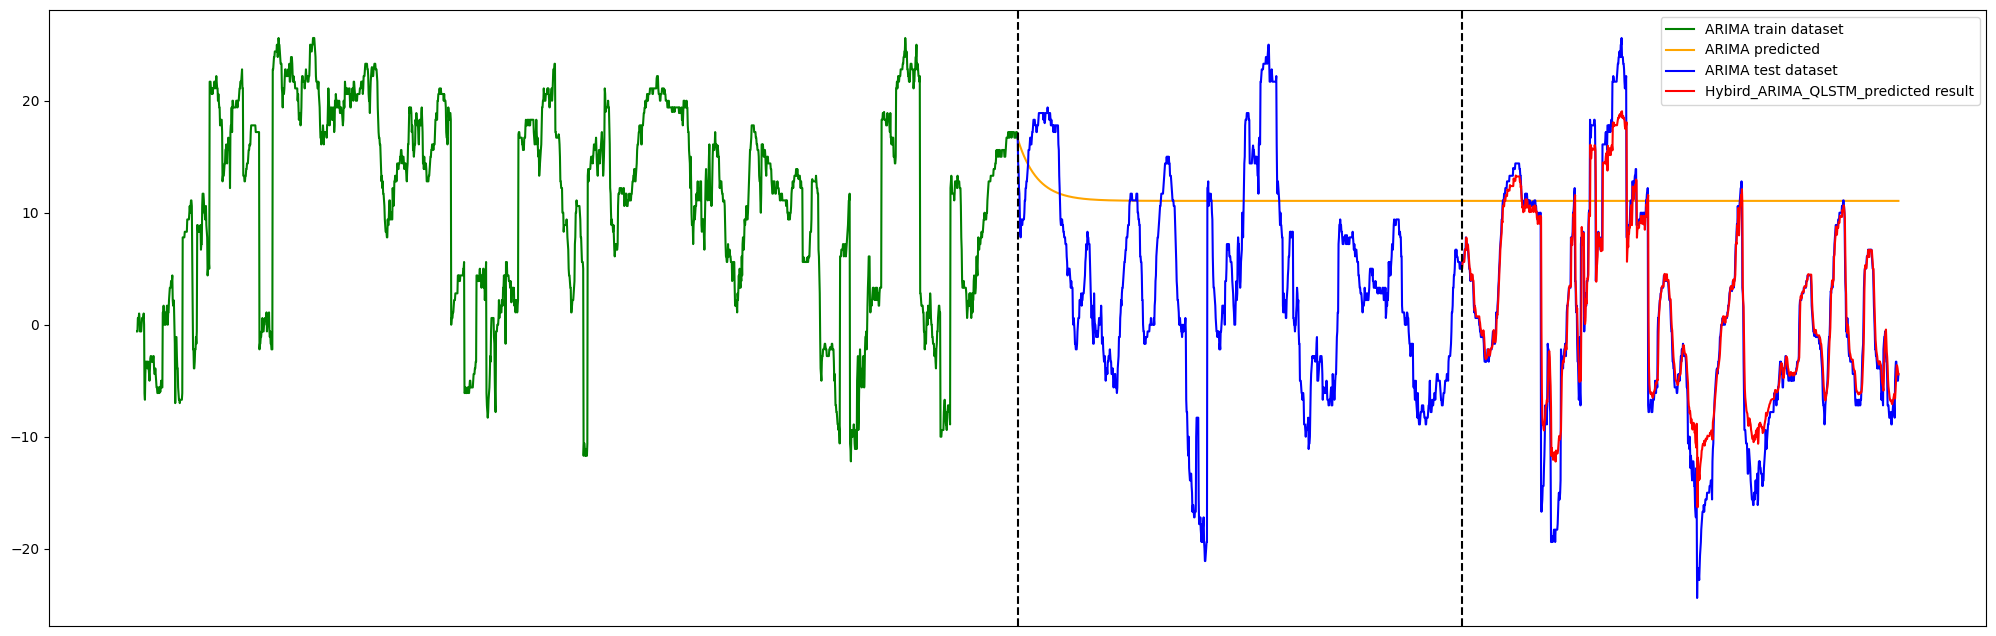

In [37]:
plt.figure(figsize=(25,8))
plt.plot(train_data['dewptm'], label ='ARIMA train dataset', color='green')
plt.plot(ARIMA_Result['predicted'], label ='ARIMA predicted', color='orange')
plt.plot(ARIMA_Result['raw'], label = "ARIMA test dataset", color ='blue')
plt.plot(frq['final'], label = 'Hybird_ARIMA_QLSTM_predicted result', color='red')
plt.axvline(x=len(train_data['dewptm']), c='black', linestyle='--')
plt.axvline(x=len(train_data['dewptm']) + len(ARIMA_Result['predicted']) - len(frq['final']), c='black', linestyle='--')
plt.gca().set_xticks([])
plt.plot()
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(final_result_qlstm,ARIMA_Result['raw'][size+window_size:].values )    
mae = mean_absolute_error(final_result_qlstm, ARIMA_Result['raw'][size+window_size:].values)
rmse = np.sqrt(mse)

print(f'X_test MSE: {mse}')
print(f'X_test MAE: {mae}')
print(f'X_test RMSE: {rmse}')

X_test MSE: 8.082899722313254
X_test MAE: 1.705551433590264
X_test RMSE: 2.843044094331506


In [39]:
torch.save(modelQ.state_dict(),'./SavedModels/Weather/NY/model/arima_QLSTM_sd')

# **LSTM MODEL**

In [40]:
class ShallowRegressionLSTM(nn.Module):
    def __init__(self, num_sensors, hidden_units):
        super().__init__()
        self.num_sensors = num_sensors  # this is the number of features
        self.hidden_units = hidden_units
        self.num_layers = 1

        self.lstm = nn.LSTM(
            input_size=num_sensors,
            hidden_size=hidden_units,
            batch_first=True,
            num_layers=self.num_layers
        )

        self.linear = nn.Linear(in_features=self.hidden_units, out_features=1)

    def forward(self, x):
        batch_size = x.shape[0]
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()

        _, (hn, _) = self.lstm(x, (h0, c0))
        out = self.linear(hn[0]).flatten()  # First dim of Hn is num_layers, which is set to 1 above.

        return out

In [41]:
batch_size = 4
learning_rate = 0.004
num_epochs = 5
trainDataloader = DataLoader(TensorDataset(X_train, y_train), batch_size = batch_size, shuffle = False)
testDataloader = DataLoader(TensorDataset(X_test,y_test), batch_size = batch_size, shuffle = False)
device = "cpu"
modelQ = ShallowRegressionLSTM(num_sensors=1, hidden_units=6)
criterion = nn.MSELoss()
optimizerQ = torch.optim.Adam(modelQ.parameters(), lr = learning_rate, betas = (0.0, 0.9))

In [42]:
histQ = np.zeros(num_epochs)
histQacc = np.zeros(num_epochs)

count = 0
for epoch in range(num_epochs):
    loss_Q = []
    rmse_q = []
    correct = 0
    batches = 0
    for (x, y) in trainDataloader:
        modelQ.zero_grad()
        x = x.to(device)
        y = y.to(device)
        output = modelQ(x)

        label = y.squeeze(1)
        #print(output)
        #print(label)
        lossQ = criterion(output, label)
        lossQ.backward()
        optimizerQ.step()
        
        #correct += (output == label).float().sum()
        #batches +=1
        
        loss_Q.append(lossQ.item())
    histQ[epoch] = np.sum(loss_Q)
    
    #print(correct)
    #histQacc[epoch] = correct/batches
    print(f'[{epoch+1}/{num_epochs}]  LossQ:{np.sum(loss_Q)} ')

[1/5]  LossQ:88.47325012252259 
[2/5]  LossQ:27.926414690125966 
[3/5]  LossQ:19.506320328864774 
[4/5]  LossQ:16.995902924263646 
[5/5]  LossQ:16.123831606761087 


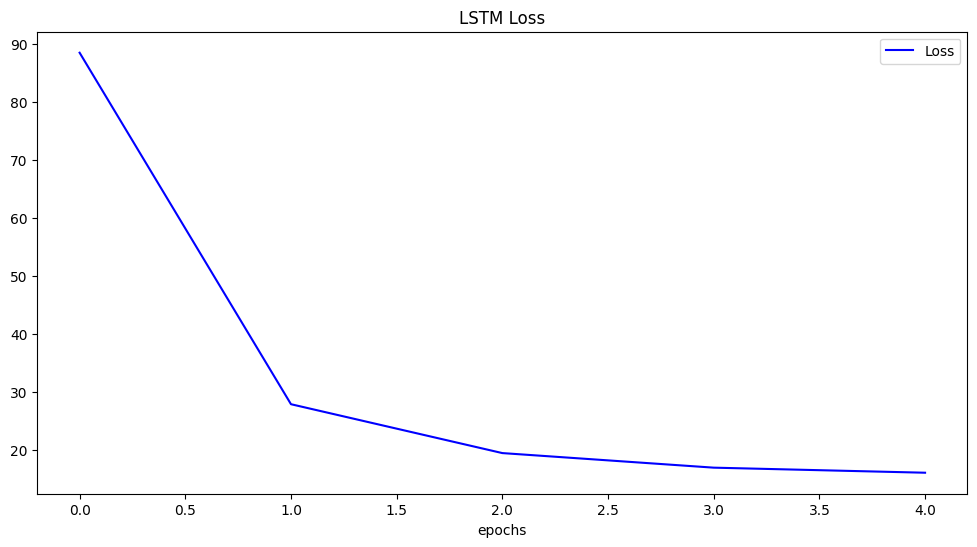

In [43]:
np.savetxt('./SavedModels/Weather/NY/loss/arima_lstm.txt',histQ)
plt.figure(figsize = (12, 6))
plt.plot(histQ, color = 'blue', label = 'Loss')
plt.title('LSTM Loss')
plt.xlabel('epochs')
plt.legend(loc = 'upper right')

In [44]:
pred_y_train = modelQ(X_train)
pred_y_test = modelQ(X_test)
pred_y_train = pred_y_train.reshape(-1, 1)
pred_y_test = pred_y_test.reshape(-1, 1)

In [45]:
y_train_true = train_target_scalar.inverse_transform(y_train)
y_train_pred = train_target_scalar.inverse_transform(pred_y_train.cpu().detach().numpy())
y_test_true = test_target_scalar.inverse_transform(y_test)
y_test_pred = test_target_scalar.inverse_transform(pred_y_test.cpu().detach().numpy())

In [46]:
np.savetxt('./SavedModels/Weather/NY/train/arima_lstm.txt',y_train_pred)
np.savetxt('./SavedModels/Weather/NY/test/arima_lstm.txt',y_test_pred)

Training dataset MSE: 9.795718967188408 RMSE:3.1298113309253015


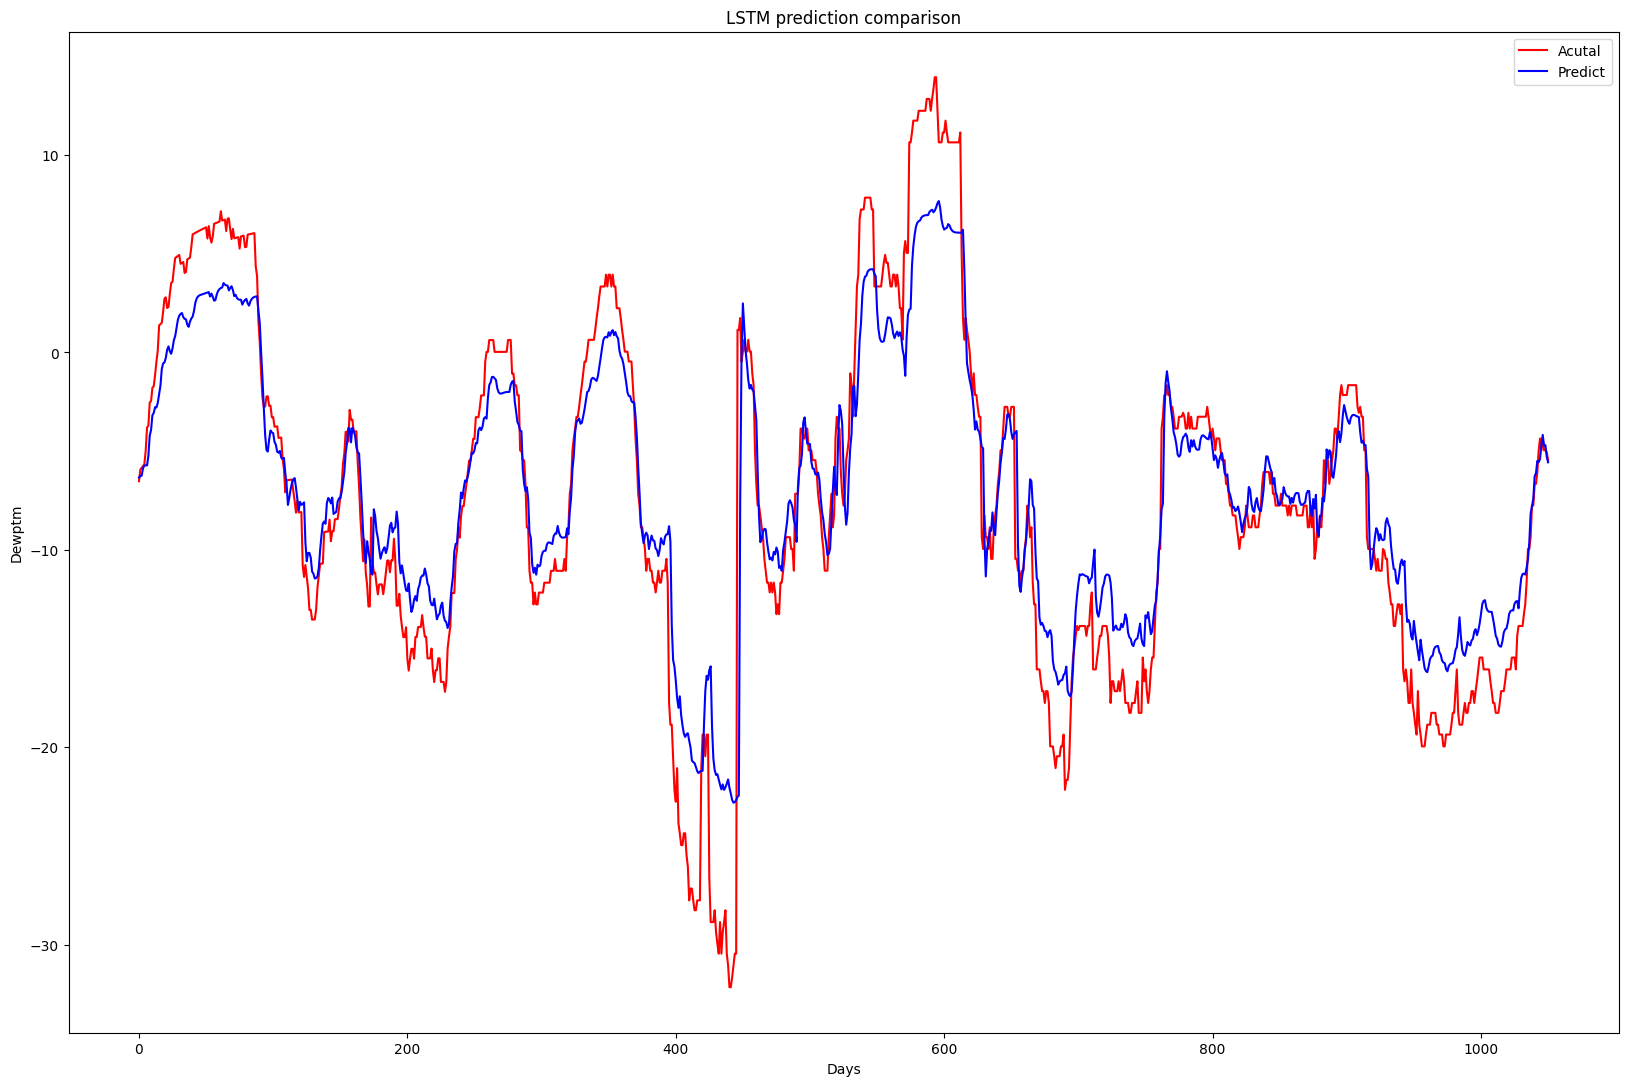

In [47]:
plt.figure(figsize=(20, 13))
plt.plot(y_train_true, color = 'red', label = 'Acutal')
plt.plot(y_train_pred, color = 'blue', label = 'Predict')
plt.title('LSTM prediction comparison')
plt.ylabel('Dewptm')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_train_true, y_train_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset MSE: {MSE} RMSE:{RMSE}')

Training dataset RMSE:3.534094015839813


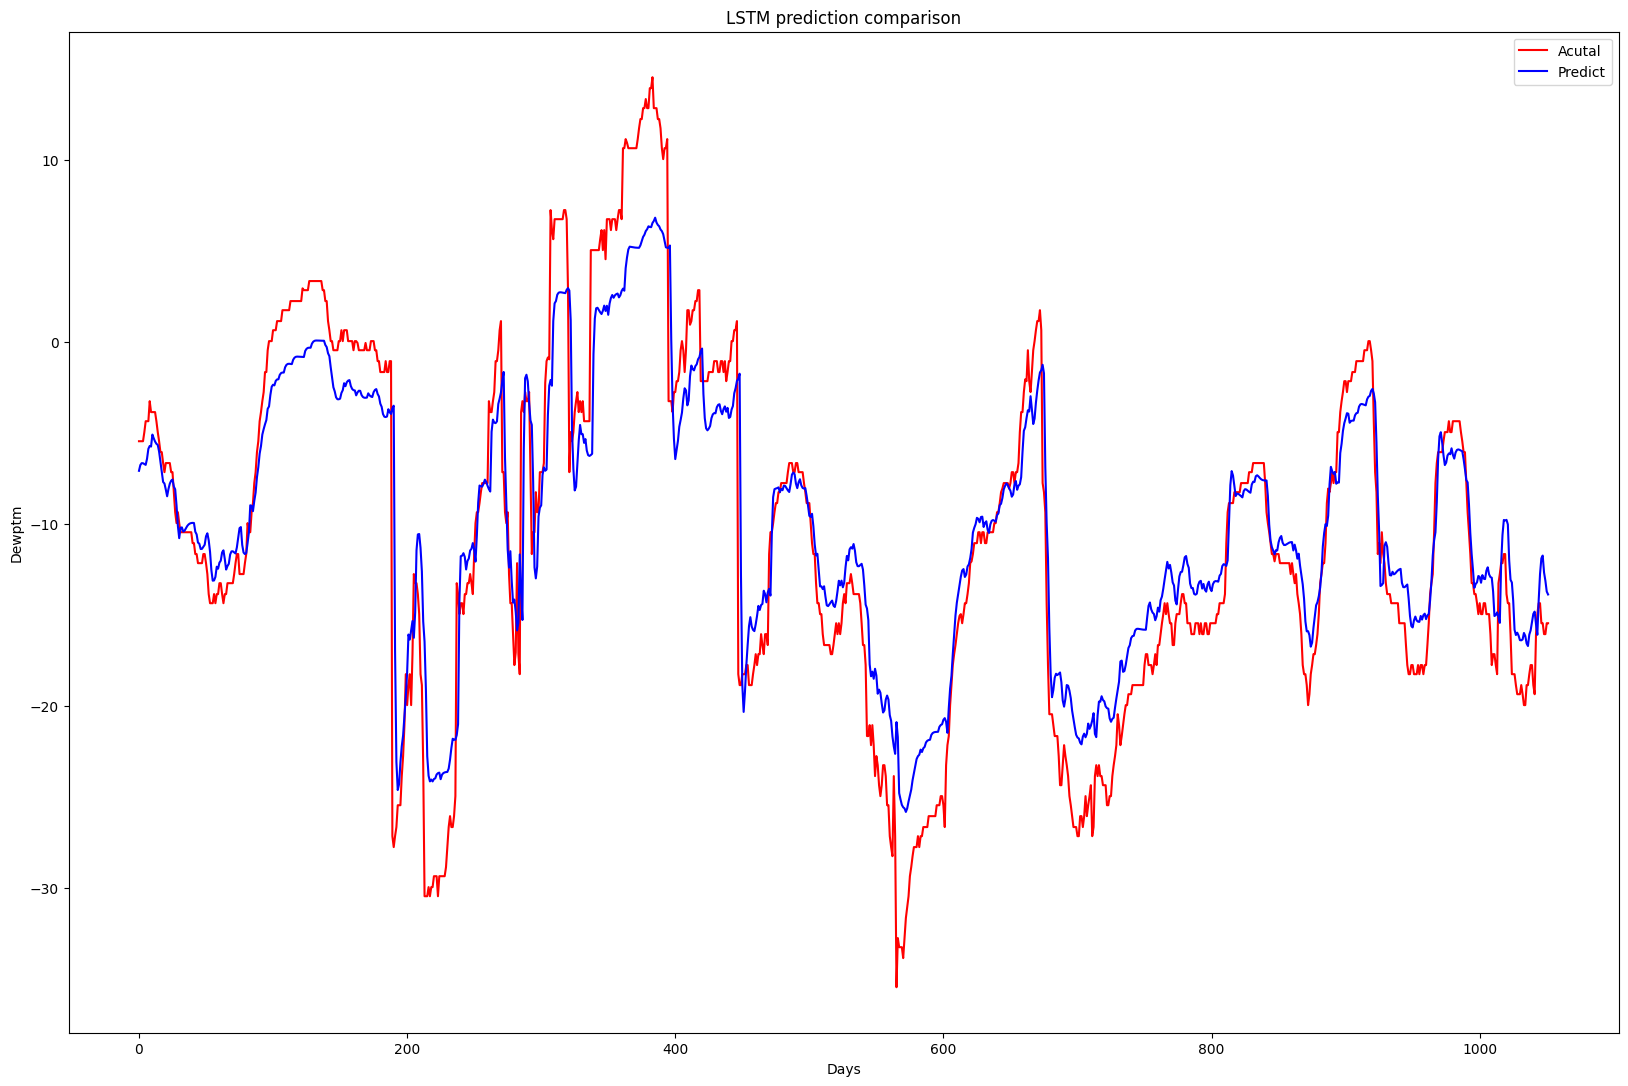

In [48]:
plt.figure(figsize=(20, 13))
plt.plot(y_test_true, color = 'red', label = 'Acutal')
plt.plot(y_test_pred, color = 'blue', label = 'Predict')
plt.title('LSTM prediction comparison')
plt.ylabel('Dewptm')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_test_true, y_test_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset RMSE:{RMSE}')

In [49]:
final_result= ARIMA_Result['predicted'][size+window_size:].values + y_test_pred.squeeze(1)

In [50]:
fr = ARIMA_Result[['predicted','raw']][size+window_size:].copy()
fr['final'] = final_result
fr

predicted  raw     final
pickup_datetime                              
2016-11-25 09:51:00  11.056827  5.6  3.974272
2016-11-25 10:51:00  11.056827  5.6  4.289510
2016-11-25 11:51:00  11.056827  5.6  4.394403
2016-11-25 12:51:00  11.056827  5.6  4.390644
2016-11-25 13:51:00  11.056827  5.6  4.345009
...                        ...  ...       ...
2016-12-31 19:51:00  11.056827 -4.4 -0.682620
2016-12-31 20:51:00  11.056827 -4.4 -1.614230
2016-12-31 21:51:00  11.056827 -5.0 -2.067044
2016-12-31 22:51:00  11.056827 -5.0 -2.658193
2016-12-31 23:51:00  11.056827 -4.4 -2.819962

[1052 rows x 3 columns]

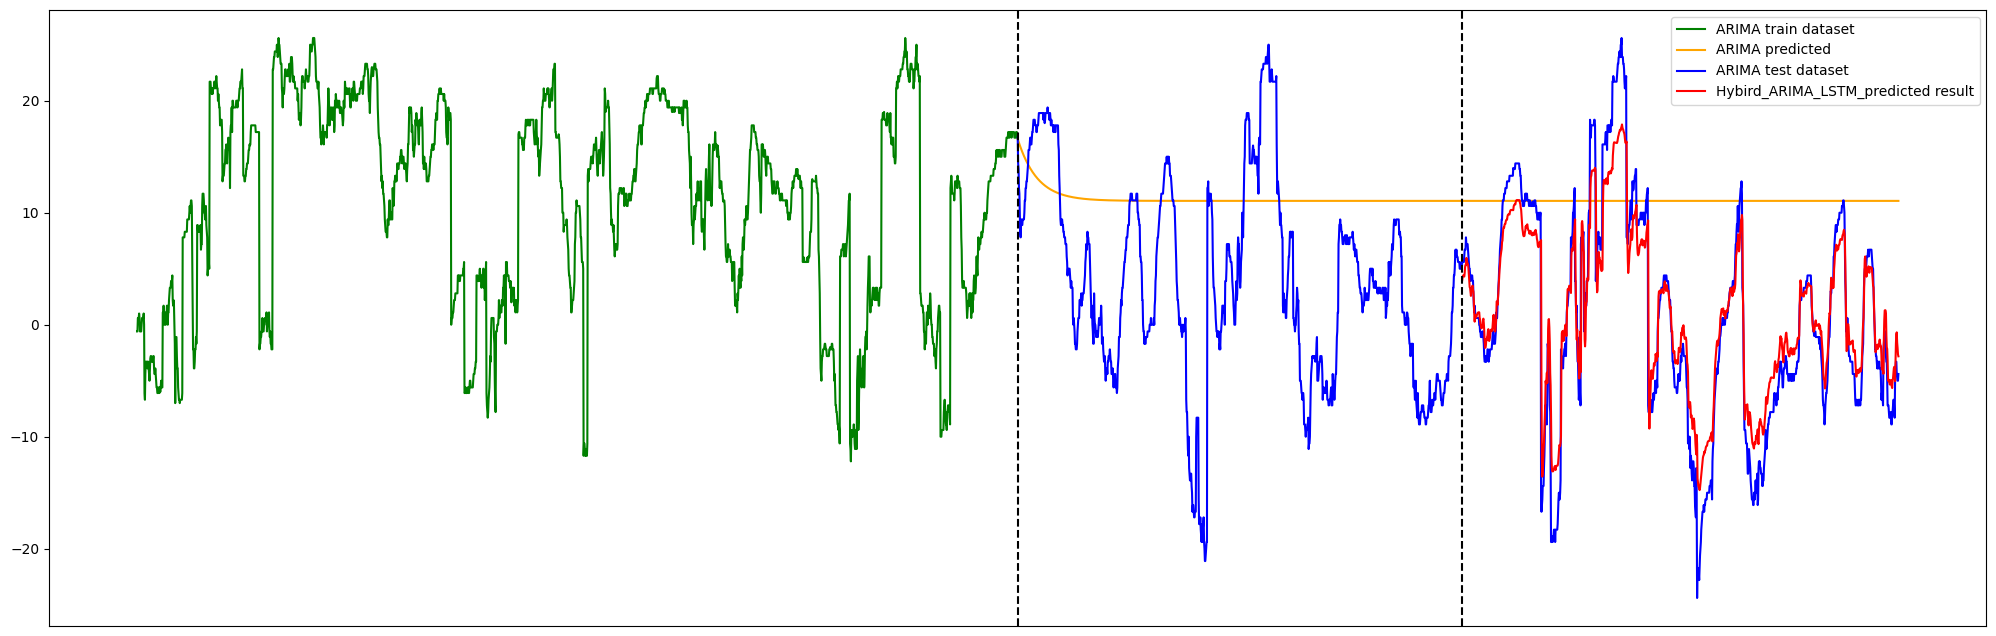

In [51]:
plt.figure(figsize=(25,8))
plt.plot(train_data['dewptm'], label ='ARIMA train dataset', color='green')
plt.plot(ARIMA_Result['predicted'], label ='ARIMA predicted', color='orange')
plt.plot(ARIMA_Result['raw'], label = "ARIMA test dataset", color ='blue')
plt.plot(fr['final'], label = 'Hybird_ARIMA_LSTM_predicted result', color='red')
plt.axvline(x=len(train_data['dewptm']), c='black', linestyle='--')
plt.axvline(x=len(train_data['dewptm']) + len(ARIMA_Result['predicted']) - len(frq['final']), c='black', linestyle='--')
plt.gca().set_xticks([])
plt.plot()
plt.legend()
plt.show()

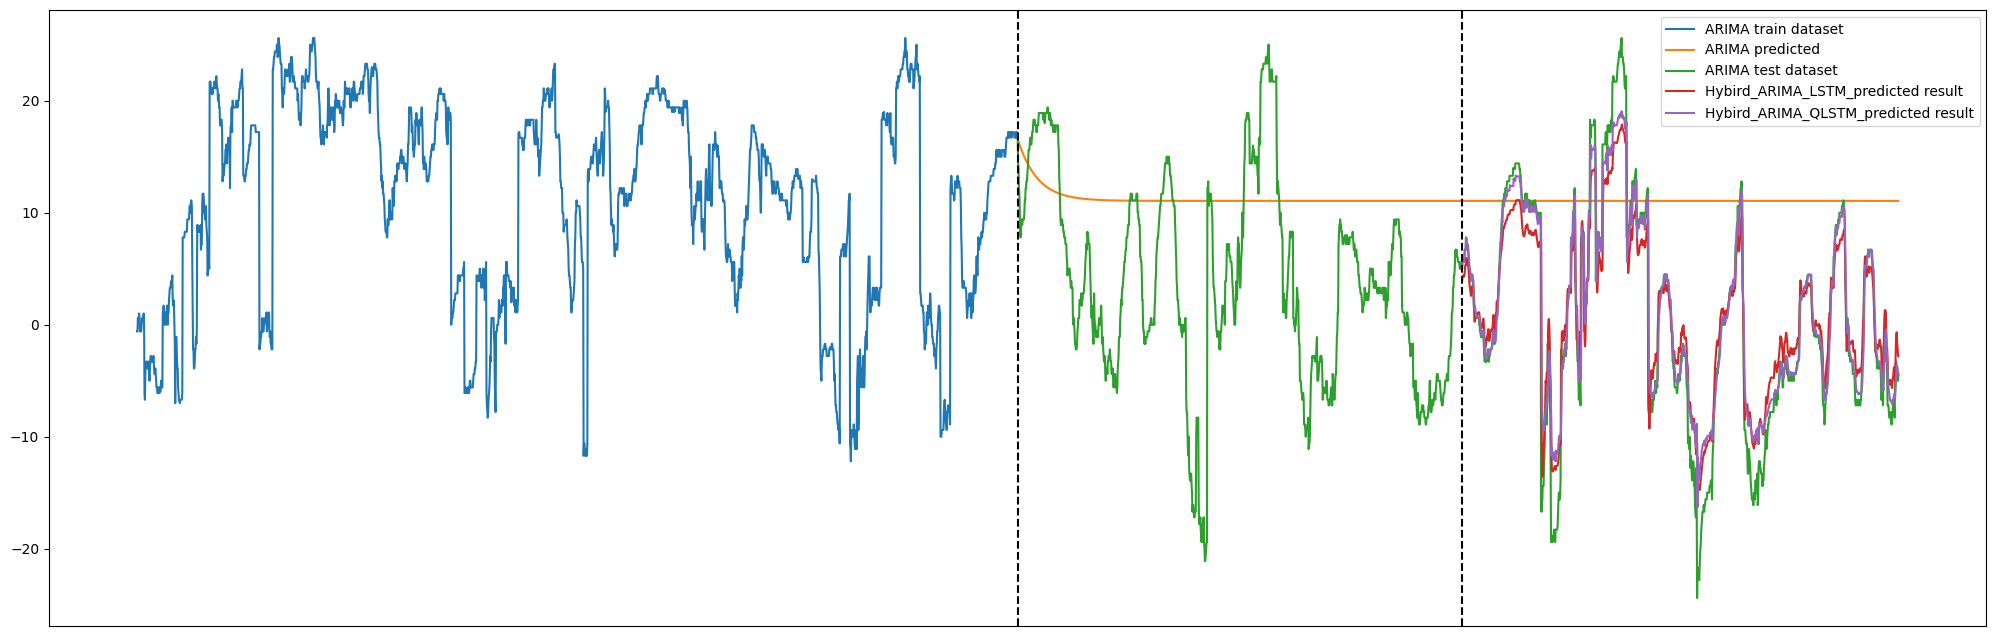

In [52]:
plt.figure(figsize=(25,8))
plt.plot(train_data['dewptm'], label ='ARIMA train dataset')
plt.plot(ARIMA_Result['predicted'], label ='ARIMA predicted')
plt.plot(ARIMA_Result['raw'], label = "ARIMA test dataset")
plt.plot(fr['final'], label = 'Hybird_ARIMA_LSTM_predicted result')
plt.plot(frq['final'], label = 'Hybird_ARIMA_QLSTM_predicted result')
plt.axvline(x=len(train_data['dewptm']), c='black', linestyle='--')
plt.axvline(x=len(train_data['dewptm']) + len(ARIMA_Result['predicted']) - len(frq['final']), c='black', linestyle='--')
plt.gca().set_xticks([])
plt.plot()
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(final_result,ARIMA_Result['raw'][size+window_size:].values )    
mae = mean_absolute_error(final_result, ARIMA_Result['raw'][size+window_size:].values)
rmse = np.sqrt(mse)

print(f'X_test MSE: {mse}')
print(f'X_test MAE: {mae}')
print(f'X_test RMSE: {rmse}')

X_test MSE: 10.36987054936572
X_test MAE: 2.5719221901184786
X_test RMSE: 3.2202283380787953


In [54]:
torch.save(modelQ,'./SavedModels/Weather/NY/model/arima_lstm')

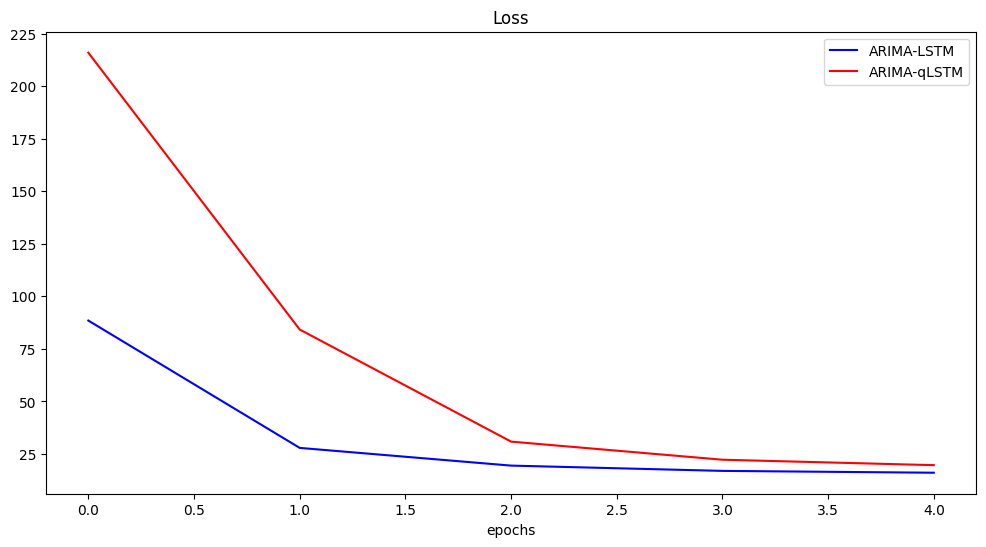

In [55]:
plt.figure(figsize = (12, 6))
plt.plot(histQ, color = 'blue', label = 'ARIMA-LSTM')
plt.plot(histQ1, color='red', label='ARIMA-qLSTM')
plt.title('Loss')
plt.xlabel('epochs')
plt.legend(loc = 'upper right')